# Import Libraries

Import libraries and set date parameters for Regression Model. 

In [19]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt 
import statsmodels.formula.api as smf

# set date parameters 
start = dt.datetime(2017, 1, 1)
end = dt.datetime.now()


print("Date Parameters:"
      ,"\nStart Date:",start
      ,"\nEnd Date", end)

Date Parameters: 
Start Date: 2017-01-01 00:00:00 
End Date 2022-12-01 23:21:23.076011


# Pull Crypto Data 

Using Pandas Data Reader, retrieve Bitcoin, Ethereum Historical Data 

In [2]:
cryptodata = pdr.get_data_fred(['CBBTCUSD','CBETHUSD'], start, end)

#Seperate crypto data into their own dataframe 
X =pdr.get_data_fred(['CBBTCUSD']) #Use variable X to define our indepdent(explanatory) Variable, in this case, Bitcoin. 
Y =pdr.get_data_fred(['CBETHUSD']) #Use variable Y to define our dependent(response) Variable, in this case, Ethereum. 

#X = sm.add_constant(X)  #add constant to our Bitcoin dataset 

print(cryptodata) # prevew our BTC-ETH dataset 
#print(X)          # preview our bitcoin dataset

            CBBTCUSD  CBETHUSD
DATE                          
2017-01-01    992.95      8.18
2017-01-02   1011.45      8.38
2017-01-03   1020.67      9.59
2017-01-04   1130.30     11.17
2017-01-05   1007.00     10.23
...              ...       ...
2022-11-27  16428.77   1193.72
2022-11-28  16193.89   1166.69
2022-11-29  16441.63   1216.23
2022-11-30  17179.78   1295.80
2022-12-01  16980.55   1276.41

[2161 rows x 2 columns]


# Execute Regression Model (Ordinary Least Squares Method)

In [3]:
# Y(depdent variable) ~ X(indepdent variable)
reg1='CBETHUSD~CBBTCUSD'

model=smf.ols(reg1,cryptodata).fit()

print(model.summary())

#Believe this code was cleaning data to forward/backward fill 
X= X.fillna(method = "pad")
Y = Y.fillna(method = "pad")
X = pd.DataFrame(X.replace([np.inf, -np.inf], np.nan))
X = X.fillna(method='ffill')
X = X.fillna(method='bfill')
X = X.iloc[:, 0]

                            OLS Regression Results                            
Dep. Variable:               CBETHUSD   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 1.365e+04
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:08:59   Log-Likelihood:                -16155.
No. Observations:                2160   AIC:                         3.231e+04
Df Residuals:                    2158   BIC:                         3.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -135.8108     13.336    -10.183      0.0

In [4]:
print("Parameters: ", model.params)                          #obtain parameters (EFFR Coefficient, Intercept)
print("R-Squared: ", round(model.rsquared *100,2),"%")       #obtain rsquared   - validate model: 99%

Parameters:  Intercept   -135.810792
CBBTCUSD       0.063897
dtype: float64
R-Squared:  86.35 %


# Residuals Analysis 

1) Describe Residuals Dataset 

2) Plot Residuals 

In [5]:
uhat = model.resid # Map out Residuals 

Partial Regression Plot

eval_env: 1
eval_env: 1


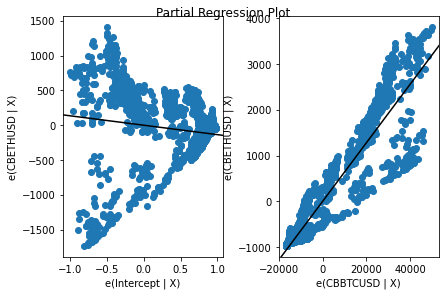

In [6]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=.01)

<function matplotlib.pyplot.show(close=None, block=None)>

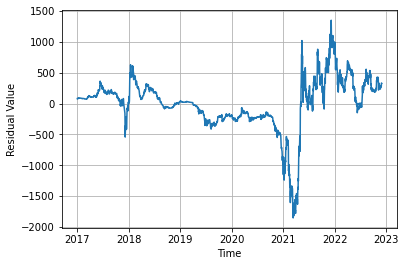

In [7]:
plt.plot(uhat)          # Plot Residuals 
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.grid(True)
plt.show 

eval_env: 1


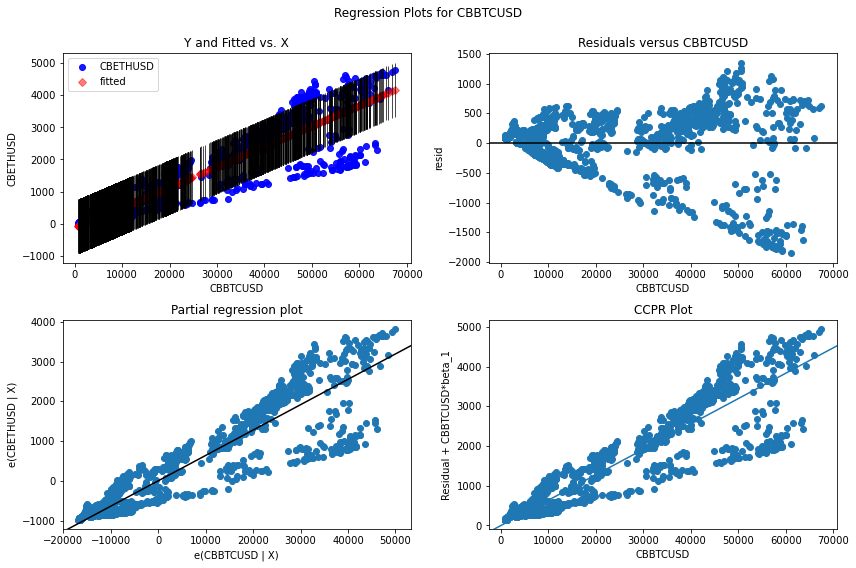

In [8]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'CBBTCUSD', fig =fig)

<AxesSubplot:xlabel='CBBTCUSD', ylabel='CBETHUSD'>

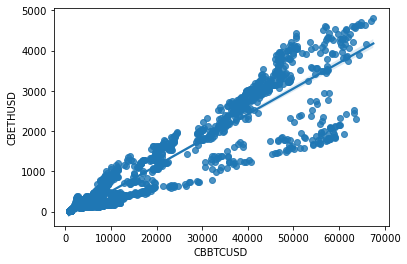

In [9]:
import seaborn as sns
sns.regplot(x='CBBTCUSD', y ='CBETHUSD', data=cryptodata)

In [10]:
#ax = motif.plot(x='motifScore', y='expression', kind='scatter')

# plot regression line on the same axes, set x-axis limits
#ax.plot(x, p.const + p.motifScore * x)
#ax.set_xlim([1, 2])

Residuals Analysis Conclusion: 

Time Frame: 2017 - 2021 

Our residuals during ths time frame are consistently within our zero line and at times range from (- $ 500,$500). Towards the end of this time frame, we begin to see our residuals stray further away from the zero line and a higher variablity begins during this time frame (end of 2020  - 2021).

Time Frame: 2022 - Today 

Our Residuals range (-100, 600) is within a more normal range at this point. 

Overall conclusion: Our high R-Squared results (86.35%) indicates that Ethereum moves relatively in line with the movement of Bitcoin. 

# Visualizing our Fitted Line against Actual ETH 

In [11]:
yhat=model.fittedvalues

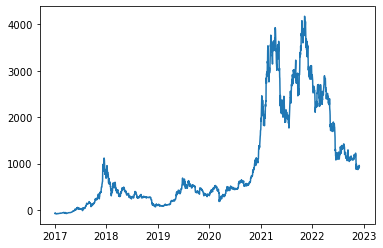

In [12]:
plt.plot(yhat)

<function matplotlib.pyplot.show(close=None, block=None)>

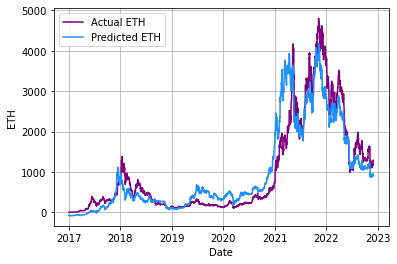

In [13]:
plt.plot(cryptodata.CBETHUSD, label = "Actual ETH", color = 'purple')
plt.plot(yhat, label = "Predicted ETH", color = 'dodgerblue')
plt.xlabel('Date')
plt.ylabel('ETH')
plt.grid(True)
legend=plt.legend()
plt.show

In [15]:
sp = cryptodata.plot(x = 'CBBTCUSD',y = 'CBETHUSD', kind = 'scatter')
sp
print('Yhat = (x)',mode.params[CBBTCUSD'],model.params['Intercept']

SyntaxError: invalid syntax (3975106226.py, line 7)

# Bitcoin Actuals Vs Ethereum Actuals 

<function matplotlib.pyplot.show(close=None, block=None)>

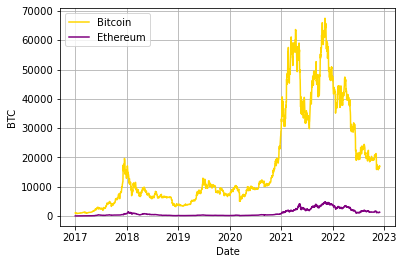

In [16]:
plt.plot(cryptodata.CBBTCUSD,  label = "Bitcoin", color = 'gold')
plt.plot(cryptodata.CBETHUSD, label = "Ethereum", color = 'purple')
plt.xlabel('Date')
plt.ylabel('BTC')
plt.grid(True)
legend=plt.legend()
plt.show

Ethereum Actuals due to incompatability of scaling on previous plot 

<function matplotlib.pyplot.show(close=None, block=None)>

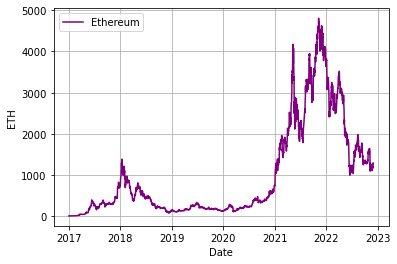

In [17]:
plt.plot(cryptodata.CBETHUSD, label = "Ethereum", color = 'purple')
plt.xlabel('Date')
plt.ylabel('ETH')
plt.grid(True)
legend=plt.legend()
plt.show

Ehtereum Actuals to visually compare against Bitcoin Actuals. Demonstrating similr behavior to Bitcoin. 